# Investigate A Dataset - Final Project

> February 28th, 2017

> Ian Halter

# Table of contents

#### Section 1: Pick a Dataset
#### Section 2: Get Organized
#### Section 3: Analyze Your Data
#### Section 4: Share Your Findings
#### Section 5: Review

> [**Project Rubric**](https://review.udacity.com/#!/projects/3176718735/rubric)

### Submission Requirements
1. Submit PDF findings document
2. Submit IPython Notebook as code
    Do not submit titanic dataset
    
Author's Notes:
* Install Pandoc 1.19 before exporting to pdf or remove hyperlinks
* All results here are not conclusions, observations.
* All work here is my own, besides citations for code adapted from troubleshooting.
* Done in Python 2 and Conda

# Section 1 - Pick a Dataset

For this project I will be using the titanic Dataset.

# Section 2 - Get Organized

To get organized I will start by 
1. Setting up the conda environment
2. Create initial questions on the data
3. Read the data in, evaluate it
4. Create Final questions based on dataset values

## Setting up the conda environment

In [1]:

# Run Anaconda Environment necessary for this project 
'''
This will install a Python 2 environment for this 
project with necessary libraries.
conda install --name py2u_titanic python=2 matplotlib numpy pandas jupyter seaborn

Update:
Run > conda install pandoc
'''

import numpy as np
import pandas as pd

titanic = pd.read_csv('titanic-data.csv')

### Create initial questions of the data 
1. How successful was the "Save the women and children" plan? (portrayed heroically in the *almost* Best Picture film)
2. did more wealthy people survive?



## Read data in and evaluate it

First I will apply some basic functions to the new titanic dataset to get an idea of the types of data I will be working with, the amount of data and overall distributions of it. This is a great practice for anyone recieving a new dataset.

In [2]:
# Check the data with .head() and .describe() functions

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check out the distribution of variables and summary statistics

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This preview of the data and it's summary statistics tells me a lot about the types of data.

* Passenger Id - is a key value, or index
* Survived - is a numeric boolean of 1 or 0
* Age - most likely age in years
* Cabin - isn't always populated, there are NaN values in the first few records

[**Kaggle Website Source**](https://www.kaggle.com/c/titanic/data)
The Kaggle Website provided by Udacity tells us more:

* Pclass - a numerical lookup status, where 1 = Upper Class Person, 2 = Middle, 3 = Lower
* SibSp - number of siblings/spouses on board (defined in detail on website)
* Parch - number of parents/children on board (defined in detail on website)
* Fare - Price in 1912 Dollars for the ticket

But there are also a lot of other columns on the Kaggle site, appearing in .head() but not in .describe(). I think these values are here, but that the .describe() method can't do math on them because they are non numeric. I'll confirm that in the next block.

In [4]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Clear here that Sex, Ticket, Cabin and Embarked are included. We can probably use all fields besides Ticket to try and create better questions.

These are non-numeric fields and they are present. 

## Create final dataset questions based on data values
~~. How successful was the "Save the women and children" plan? (portrayed heroically in the *almost* Best Picture film)~~
1. *Revised* Were more women and children rescued than men or single persons? *Since we can only measure success with "Survived", there isn't a need to frame morbidly as 'successful' :)*
2. "My life is worth more than yours!" - was there indication of a wealth bias towards survival rate? Was this reflected in the children and women boarding? (Did the wealthy have as many kids as the poor?)
3. "Too Old to Ride this flotsom" - Did people implicitly come upon an age cutoff for survival?
4. Sadness. How many parents with kids missed the boat?

For the sake of project requirements I will be comparing the dependent variable, survival, across multiple independent variables: age, sex, familyname, wealth.

# Section 3 - Analyze your data

Here I will analyze the dataset and attempt to clean it, just like the lesson taught in removing test udacity accounts and users that didn't complete more than a week of the program.

After I will analyze the data based on the questions in the order they were presented.

In [5]:
# Install libraries to do exploratory graphing later on

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns  #helps make graphs same 

In [6]:
# A lot of initial plots weren't working, so I decided to clean the data of NaN's
# decided to see how many were in each column
titanic.isnull().sum()

#http://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I initially had trouble plotting and wrote some poor code to find all of the NaN values. It was only after going online could I find a more aesthetic and readable solution.

It is clear Age, Cabin and Embarked contain NaN values, and therefore those need to be cleaned and saved as a separate dataset for holistic analysis. I'm going to simply remove the Cabin column, because if I removed all records that had Cabin=nan I would have 891 - 687 (or 204) values, which doesn't represent the whole dataset.

> Note: Operations such as these have implications. I'm hoping (and assuming) that the ages removed aren't all old people or young people! This could skew my results down the road.

In [7]:
# Let's remove rows where Age and Embarked are nan and remove Cabin column
# the nan value is a value in the NumPy library, this was the only way I could clean the data set successfully

titanic_clean = titanic[titanic['Age'] != np.nan]
titanic_clean = titanic_clean[titanic['Embarked'] != np.nan]
titanic_clean = titanic_clean.drop('Cabin', axis=1)
    #inplace=True keeps data frame
print titanic_clean.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [8]:
def make_sex_binary(value):
    ## Takes in one column containing 'male' or 'female' data points 
    if str(value).lower() == 'male':
        value = 1
    elif str(value).lower() == 'female':
        value = 0
    else:
        value
    return value

# test
print titanic.iloc[0]['Sex']
print titanic.iloc[0].apply(make_sex_binary)['Sex']

male
1


In [9]:
titanic_clean['Sex'] = titanic_clean['Sex'].apply(make_sex_binary)

print titanic_clean.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  


Now that our dataset is initially cleaned, let's start tackling some questions.

## 1. Were more women and children rescued than men or single persons?

We can look at success rates using vector operations on the panda data frame: titanic_clean. Or we could plot them.
I'm going to create a function to output survival based on the women, children, men and single people criteria. Then compare the survival rates against these to. My dependent variables are a combination of age and gender, while my independent is this survival rate.

In [10]:
def success_rate(column):
    return str(float(column.sum()) / 
               float(column.count())
                ) + ' %'

In [11]:
# Let's create the children, women, men and single adults subsets with vector operations.

children = titanic_clean[titanic_clean['Age'] < 18]
children = children[children['Parch'] > 0]

women = titanic_clean[titanic_clean['Age'] >= 18]
women = women[women['Sex'] == 0]

single_adults = titanic_clean[titanic_clean['Age'] >= 18]
single_adults = single_adults[single_adults['Parch'] == 0]

men = titanic_clean[titanic_clean['Age'] >= 18]
men = men[men['Sex'] > 0]

# Now we can compare the success rates

print success_rate(children['Survived'])      + ' of Children survived'
print success_rate(women['Survived'])         + ' of Women survived'
print success_rate(single_adults['Survived']) + ' of Single Adults survived'
print success_rate(men['Survived'])           + ' of Men survived'

#apply function was giving errors I couldn't understand.
# children['Survived'].apply(success_rate)
#AttributeError: 'long' object has no attribute 'sum'


0.555555555556 % of Children survived
0.771844660194 % of Women survived
0.347648261759 % of Single Adults survived
0.177215189873 % of Men survived


Cool, so we can see that the number of women and children were onboard survived more than the men! However single people still had more success than men in general.

I expect there to be more single men than women, based on high school history class and my stereotype of post US industrial revolution family dynamic. So I would therefore expect the single surival rate to be closer to male survival rate. This is kind of interesting....the Kaggle website does make mention of mistresses.

Were there even amounts of men/women? How many children were there? Survival rate looks more interesting compared the magnitude of people on board. Let's compare how many of each (men, women, children, singles) were on board.

In [12]:
print 'Total Children: ' + str(children['PassengerId'].count())
print 'Total Women: ' + str(women['PassengerId'].count())
print 'Total Single Adults: ' + str(single_adults['PassengerId'].count())
print 'Total Men: ' + str(men['PassengerId'].count())

#print 'Overall Survival rate: %04.3f' % (titanic_clean['Survived'].sum()/float(titanic_clean['Survived'].count()))
print 'Overall Survival rate: '+ success_rate(titanic['Survived'])

Total Children: 81
Total Women: 206
Total Single Adults: 489
Total Men: 395
Overall Survival rate: 0.383838383838 %


I'd rather view these results in print statements that compare the data in one line, then flip back and forth.

In [13]:
print '%s of %s Children survived' % (str(success_rate(children['Survived'])),str(children['PassengerId'].count()))
print '%s of %s Women survived'    % (str(success_rate(women['Survived'])),str(women['PassengerId'].count()))
print '%s of %s Singles survived'  % (str(success_rate(single_adults['Survived'])),str(single_adults['PassengerId'].count()))
print '%s of %s Men survived'      % (str(success_rate(men['Survived'])),str(men['PassengerId'].count()))

print 'Overall Survival rate: %04.3f' % (titanic_clean['Survived'].sum()/float(titanic_clean['Survived'].count()))

0.555555555556 % of 81 Children survived
0.771844660194 % of 206 Women survived
0.347648261759 % of 489 Singles survived
0.177215189873 % of 395 Men survived
Overall Survival rate: 0.384


It's clear here that there was a priority on children women, of the ones that were there. It looks like men and and singles died the most, but why that is the case warrants more research on the type of people aboard the Titanic. We will investigate in question 2.

## 2. "My life is worth more than yours!" - was there indication of a wealth bias towards survival rate? Was this reflected in the children and women boarding? (Did the wealthy have as many kids as the poor survive?)

The best way, in my opinion, to view this data is to view survival rates by wealth class (1 - Upper, 2 - Middle, 3 - Lower). I liked the .barh() plot because you can see the differences and analyze the data visually, rather than applying vector operations.

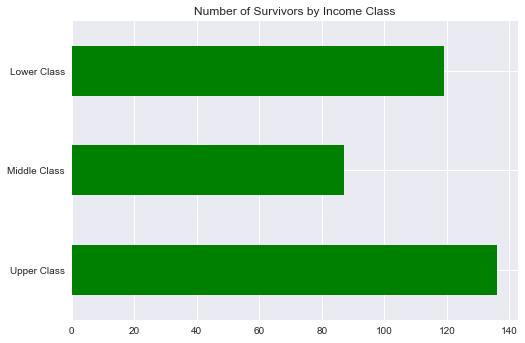

In [14]:

wealth_by_survivors = titanic_clean.groupby('Pclass').sum()['Survived']

wealth_by_survivors.index.values
wealth_by_survivors.index = ['Upper Class', 'Middle Class', 'Lower Class']
wealth_by_survivors.columns = ['Number of Survivors']

wealth_by_survivors.plot.barh(title = 'Number of Survivors by Income Class', color = 'g')


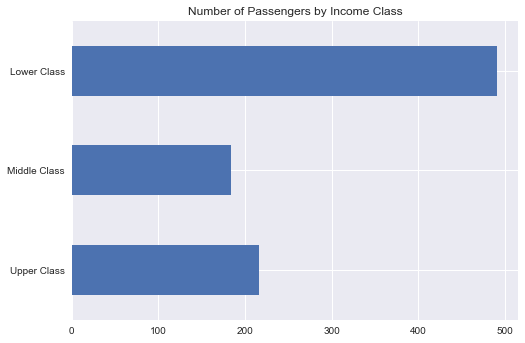

In [15]:
wealth_by_passengers = titanic_clean.groupby('Pclass').count()['PassengerId']

wealth_by_passengers.index = ['Upper Class', 'Middle Class', 'Lower Class']
wealth_by_passengers.columns = ['Number of Passengers']

wealth_by_passengers.plot.barh(title = 'Number of Passengers by Income Class')

Most important to note here is the sheer increase in number of lower class people in the cleaned dataset of passengers, compared the number of survivors. The lower class clearly survived the least.

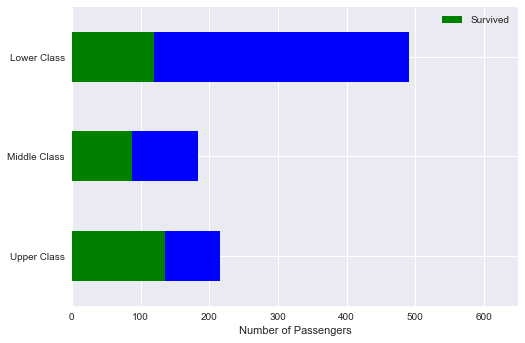

In [16]:
ax = wealth_by_passengers.plot.barh(color = 'b')

wealth_by_survivors.plot.barh(color = 'g', ax = ax, legend = True, xlim = (0,650)).set_xlabel('Number of Passengers')

# The length of the blue indicates the portion of income class that didn't survive.

# Udacity review recommended unstack() for bar plots, and set_ylabel and set_xlabel methods for clarity
    # can't unstack subplot (ax = ax), but good to know
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

Cool! By passing a multi-color string and creating a separate axes object, we can clearly show how the Lower class had a much lower survival rate than the upper. Visually this does point to a survival bias.

We can try and view this even by another dimension: Age.

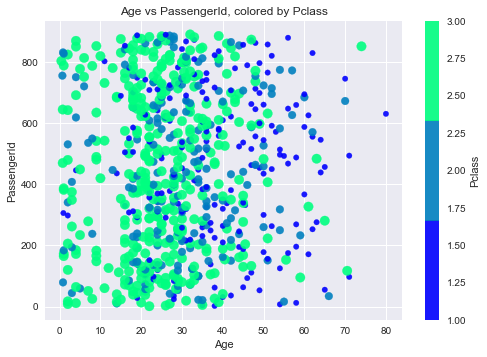

In [17]:
ax = titanic_clean.plot(kind = 'scatter', x = 'Age', y = 'PassengerId', c = 'Pclass',
                   s = titanic_clean['Pclass']*30, alpha = 0.9, 
                   title = 'Age vs PassengerId, colored by Pclass',
                   cmap=plt.cm.get_cmap('winter', 3), sharex = False)
ax.xaxis.set_visible(True)
ax.set_xlabel('Age')
ax.set_ylabel('PassengerId')

#http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
# s = ... assigns a large size of the dot based on class
# alpha parameter allows transparency of data points for overlap

# http://matplotlib.org/api/cm_api.html
# http://matplotlib.org/examples/color/colormaps_reference.html, will be using "winter" as it has no white values

# colormap solution adapted from @jakevdp on Github CategoricalCMAP.ipynb can remove
    # the unnecessary 0.25 tick marks on the color bar as needed
    
# for those having issues plotting x labels with plot(kind ='scatter'....), this is a result of a pandas bug
# https://github.com/ipython/ipython/issues/8653
    # set sharex = False as an argument, should resolve problem

Both plots communicate there were many low class passengers onboard, even though our data doesn't include [all passengers.](http://www.titanic-facts.com/passengers-on-the-titanic.html) 

I researched and nearly 2/3 of the passengers were crew members or "third class ticket". I am making a large, but logical assumption that people who purchased a 3rd class ticket fell either barely into the "Middle Class" income bracket and by default, at least the "Lower Class" income bracket. Granted a crew can involve a wealthy engineer or captain, it mostly consists of poorer deck hands, cooks and waiters.

Both plots tell us the older were wealthier, and the wealthier you were, the higher your success rate. This isn't statistically factual, but visually indicative.

*For more information*:

[**This site**](http://www.titanic-facts.com/passengers-on-the-titanic.html) is a little outdated, however it tells us there weren't many middle class passengers at all, based on number of "2nd class" and "3rd class" ticket purchases. [**This site**](http://sociologyinfocus.com/2012/04/a-nightmare-of-titanic-proportions-social-class-a-ticket-to-ride/) seems to confirm it as well, along with the notion that more upper class survived.

## 3. "Too Old to Ride this flotsom" - Did people implicitly come upon an age cutoff?

For this question we'll be looking at ages and survival rates, to determine if we can't see a trend. From the previous question older people seemed to be richer and have survived more. However if they weren't rich, did the elderly stand the same chances of success?

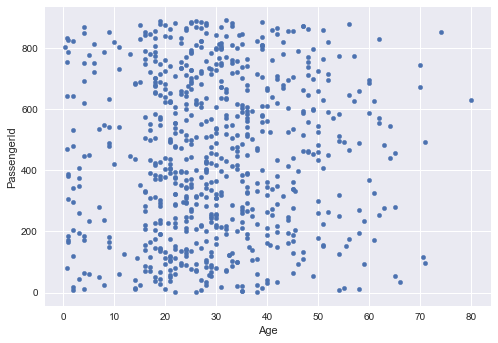

In [18]:
# Sort the dataset by age, then plot against survival
titanic_clean.plot(kind = 'scatter', x = 'Age', y = 'PassengerId')

This is the definition of an inconclusive graph. There aren't many continuous variables of which to compare ages to.

*Note - with all of these classification variables, this dataset is probably ripe for randomForest decision trees. Pun intended.*

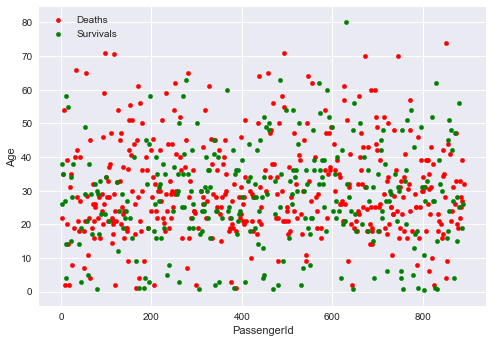

In [19]:
# http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#scatter-plot
# Super imposing values could reveal a neat type of relationship.
deaths = titanic_clean[titanic_clean['Survived'] == 0]
survivals = titanic_clean[titanic_clean['Survived'] == 1]

# create first scatter plot as an axes object
ax = deaths.plot(kind='scatter', x='PassengerId', y='Age',
                      color='r', label='Deaths')

# create second scatter plot to display output, including first scatterplot
survivals.plot(kind='scatter', x='PassengerId', y='Age',
               color='g', label='Survivals', ax=ax)
                 
# Living is green, death is red

From the visual, we can't really tell if age had any factor in who was selected to die. We can compare the averages of survival and possible correlations with the hindsight that this inspcation of the data **does not prove statistically a causal relationship, i.e. older were conclusively more likely to die**

In [20]:
print '%05.3f' % float(deaths['Age'].mean())
print '%05.3f' % float(survivals['Age'].mean())

titanic_clean.corr(method = 'pearson')

#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html

30.626
28.344


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


The correlation coefficients are not very different from zero and average ages are relatively close, so it's difficult to say whether or not people implicitly created an age cutoff for dying. I also have to state here that the "Pearson's" test assumes a normal distribution of values which I haven't even looked at. All in all, there clearly are reasons unknown or known that were more important than age when it came to deciding who would populate the lifeboats.

There is a statistical test that generates a value for categorical variables, called the chi-square test, using the same Pearson's assumption of normality. It takes the difference between an observed value (like Survival 1 or 0) and it's theoretical value based on a normal distribution (any number generated from a normal distribution with a mean of survival.mean() and standard deviation of survival.sd()). 

Categorical data is tricky - because it's not a continuous variable, so these chisquare tests are iffy. What we're looking for is whether or not the passengers of this dataset had factors (age, pclass, gender) that were statistically significant. Again, take this with a grain of salt because we are assuming A LOT about the distributions of data in this data set. For a basic intro, visit https://en.wikipedia.org/wiki/Chi-squared_test

We'll use the scipy library chisquare test, as provided by a Udacity reviewer.
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html


In [34]:
import scipy.stats as scps

In [35]:
titanic_clean.info()
# tells us what numerical values we can apply chisquared test to
# the chisq function can't compare floats/ints to strings.

# We'll use all except the name, ticket and embarked field.

titanic_chisq = titanic_clean.drop(['Embarked','Ticket','Name'], axis = 1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


In [97]:
cs = scps.chisquare(titanic_chisq)
l = [ [titanic_chisq.columns[i], cs[0][i], cs[1][i]] for i in range(0,len(titanic_chisq.columns)) ]

# cs returns a chisq array as the 1st position and a pvalue array as the second
# list comprehension is messy, but I was having problems with pd.DataFrame.append()
    
cs_results_df = pd.DataFrame(data = l, columns = ["VariableName","Test Statistic Value", "P-Value"])
print cs_results_df

print titanic_clean.describe().loc[:,['SibSp','Parch']]
# adapted from Udacity review code, using location for printing certain portions of dataframes
# took a while to get this figured out correctly

  VariableName  Test Statistic Value       P-Value
0  PassengerId         132165.000000  0.000000e+00
1     Survived            549.000000  1.000000e+00
2       Pclass            269.475936  1.000000e+00
3          Sex            314.000000  1.000000e+00
4          Age                   NaN           NaN
5        SibSp           2069.334764  1.348835e-95
6        Parch           1515.376471  3.026192e-35
7         Fare          68245.702389  0.000000e+00
            SibSp       Parch
count  891.000000  891.000000
mean     0.523008    0.381594
std      1.102743    0.806057
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    0.000000
max      8.000000    6.000000


There isn't any real surprises here, nothing really stands out. The p-values for Parch and Sibsp are statistically significant, but thats because the ChiSquare depends on the observed value - minus the expected (the mean). The quantiles indicate so many 0 values, therefore the expected values are always really close to the observed. You know the data is bad for Chisqure when the sd is greater than the 75% percentile values (just a rule I use subjectively)

For those pursuing this - I would say try it with sampling, there will be a trade-off between degrees of freedom. Or try using the chisquare(f_obs = 'Survived', f_exp = 'Sex), which takes survival values and compares them to the binary gender values. Before doing this you may need to tweak and investigate.

## 4. Sadness. How many parents missed the lifeboats? What parents of families didn't make it?

At this point I want to know the differences between parents surviving and kids surviving, granted they were a part of the same family.

Ideally I'd like to compare them side by side and see if many parents lost their lives, or if there were many large families on board. The measurement of success would be survival rate because a bigger family may have many kids survive and skew the survival rate and a smaller family may skew the parents survival rate.

First I have to remind myself of the columns and define famly members.

In [98]:
titanic.columns.values # reminding me of the column names

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

How do we determine a family member?

1. Create new column called family, parse the last name
2. Parch > 0
3. Age > 18, this is an assumption of the youngest age I would expect an adult to have a kid

We wouldn't do sibsp > 0, because what about a single parent with a single child? Granted I think this occurence is rare, and we could give a try afterwards, I don't think it is a fitting criteria at this moment.

In [99]:
# 1.
# Create function to take last name

def family_name(name):
    fn = name.split(",")[0] # names are last, title..first..middle...
    fn = fn.strip()         # remove whitespace
    return fn
    

In [100]:
# Call family name and assign it to a new variable 'FamilyName' in titanic_clean

titanic_clean['FamilyName'] = titanic_clean['Name'].apply(family_name)

In [101]:
titanic_clean.loc[0]  # shows a family name of Braun

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                                  1
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Embarked                             S
FamilyName                      Braund
Name: 0, dtype: object

In [102]:
#run group by statement
#titanic_clean.groupby('FamilyName').sum()['Survived'], can't seem to get count and sum working

'''
..Researching...
..Researching...
'''
# Need to create an aggregation object as discussed briefly in lesson
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

# takes a dictionary of a field as the key, and functions as the values
# titanic_clean_families.groupby('FamilyName').agg({'Survived': ['sum','count']})

#This could work, if we need it going forward.

# I commented every line because triple single quotes prints poorly when
#     you convert to pdf.

'\n..Researching...\n..Researching...\n'

**Here we make 3 ASSUMPTIONS, which are important to keep in mind**
1. There are no families with the same last name.
2. These 891 values accurately reflect the distribution of values for a ~2,200 passenger manifest.
3. All family members will be in the same income class.

We cannot draw any conclusions, we can just make observations.
No "This is due to that", more like "Hey that's kind of cool."

In [103]:
titanic_clean_families = titanic_clean[titanic_clean['Parch'] > 0]

In [104]:
grouped_family_survival = titanic_clean_families.groupby(['FamilyName']).agg({'Survived': ['sum','count']})

# we can see that the sum of Survivors wasn't equal to the count, which mean families were separated. :(

# comment out the first line and uncomment this one below to find average family survival rate
# titanic_clean_families.groupby(['FamilyName']).mean()['Survived']

# then if you really want to: uncomment this line to really see the Wealth Bias
# titanic_clean_families.groupby(['FamilyName','Pclass']).mean()['Survived']

'''We'll save the first one and plot it, but feel free to uncomment
   save another variable and play around'''

"We'll save the first one and plot it, but feel free to uncomment\n   save another variable and play around"

We want to look at the data holistically, before we use age cuttoffs to determine whether or not children or parents of the same family died.

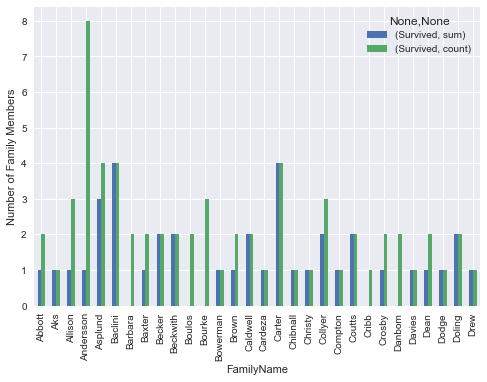

In [106]:
grouped_family_survival[0:30].plot.bar(legend = True).set_ylabel('Number of Family Members')
# this gets tough to read, even with Seaborn, so I subset the dataFrame
# remove the subset to see much more data

This is a bad graph - even after subsetting, but it tells us family sizes were relatively small, and there are definite inconsistencies in certain families being separated and those not. Small family sizes means it will be difficult to visually show if families were purposefully being split.

Take the Carter's: 3 members, 3 survivors.
Take the Andersson's: 8 members, 1 survivor.

I can't really make anything out of this, but the family dimension is cool. I need to separate data by age to determine if children were more successful than adult family members.

In [107]:
#save datasets for parents and kids to graph and compare
titanic_clean_families_parents = titanic_clean_families[titanic_clean_families['Age'] > 18]
titanic_clean_families_kids = titanic_clean_families[titanic_clean_families['Age'] <= 18]


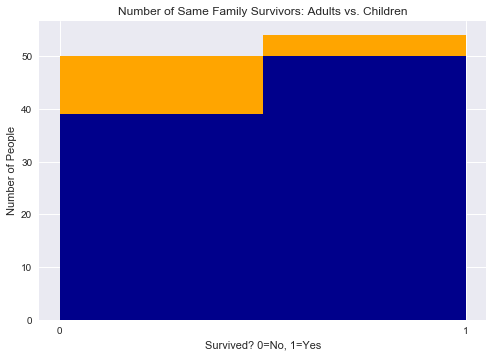

In [111]:

plot1 = titanic_clean_families_parents['Survived'].plot.hist(bins = 2, color = 'Orange')
plot2 = titanic_clean_families_kids['Survived'].plot.hist(bins = 2, color = 'DarkBlue')
plt.xlabel('Survived? 0=No, 1=Yes')
plt.ylabel('Number of People')
plt.title('Number of Same Family Survivors: Adults vs. Children')
plt.axis = ([0,1,0,75]) # http://matplotlib.org/users/pyplot_tutorial.html
plt.xticks([0,1])
plt.show()

# show an overlay to compare
# Udacity review recommended using a bar plot, and I could probabl apply the unstack method
    # this would require a Panda DataFrame and axes object going forward.
    # this can definitely be improved.
    
# also recommended was 'cut' method, which would create a categorical variable based on ages
    # so plotting in a histogram would be easier, rather than creating new DataFrames with age filters.
# titanic_clean['Age_categories'] = pd.cut(df['Age'], bins=[0,18,49,90], labels=["Child","Adult","Senior"])

Results: Looks like usually most families stayed together. Not exactly what I expected.

However these are cloudy results. More "parents" survived than kids, which means either my age minimum is too small or that the average age of a family was relatively high (i.e. a mom and dad with a 20 year old kid could've been more common than a mom/dad with two 2-year olds). This would make some adults inaccurately appear as in the children dataFrame.

My hypothesis - many more kids would survive than parents, looks either wrong or inconclusive. I would have expected maybe an older kid with very old parents to have been on a life rafe while his parents stayed on board.

Let's reset the age limit and replot.

In [112]:
#save datasets for parents and kids to graph and compare
titanic_clean_families_parents = titanic_clean_families[titanic_clean_families['Age'] > 22]
titanic_clean_families_kids = titanic_clean_families[titanic_clean_families['Age'] <= 22]


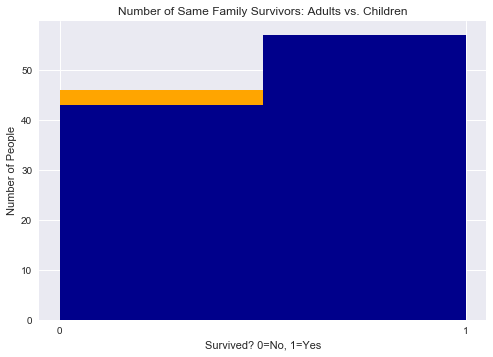

In [113]:
plot1 = titanic_clean_families_parents['Survived'].hist(bins = 2, color = 'Orange')
plot2 = titanic_clean_families_kids['Survived'].hist(bins = 2, color = 'DarkBlue')
plt.xlabel('Survived? 0=No, 1=Yes')
plt.ylabel('Number of People')
plt.title('Number of Same Family Survivors: Adults vs. Children')
plt.axis = ([0,1,0,75]) # http://matplotlib.org/users/pyplot_tutorial.html
plt.xticks([0,1])  # set x-axis major marks
plt.show()

# show an overlay to compare

As I increase the age level I don't know if I'm capturing a 'kid' at 22 or a 'parent' at 21. I could try to split out the current datasets by the Sibsp criteria, but I may weed out single children or single parents, both however being culturally rare at the time.

# Section 4 - Share your findings

1. There is evidence in visualizations, correlation coefficients and empirical data that points towards a wealth bias.

    * The colored visualizations both imply a rich bias. Older people were usually weathy and wealthy people seemed to survive more. That goes against the story of elderly self-sacrifice we are used to hearing. Neat. What others' analysis and reports leads me to believe that maybe in the cleaning process, I may have increased the biased towards the wealthy survivors who had their ages populated in the data. 
    
    * The number of poor people on the ship (Lower income class) really struck me as odd, because before now I thought everyone on board was very wealthy.

    * Other than that - it's clear many of the 1st class passengers were the survivors, because very few of the 3rd class members and crew members (who would most likely fall in Lower Class category) did not make it.

2. Women and children survived more than men, although I recognize information on 891 passengers may deviate from the total ~2,200 manifest. There were fewer children, so while fewer survived, their success rate was still better than adults (women or men). The commitment to saving women is evident highlighted by the comparison between male and female survival rates.

3. Family survival rates are cool to look at, but I can't glean anything from them.

# Section 5 - Review

Overall this was very cool to look at, Kaggle data and competitions do live up to their expectations.

## Comments:
I was disappointed in the sparse dataset, especially when I found there were many more passengers on board than present in the file provided.  Based on the classification data (categorical variables), I think an advantage can be gleamed by applying a machine learning random forest to better classify a survivor. That model essentially uses decision trees based on input criteria to define an output variable (in this case Survival). Could be cool to look into.

Conversely I think the lack of continuous variables made applying simple A/B or Hypothesis tests, from a statistical standpoint, quite difficult. Even linear regression would have been skewed to very largely weighted categorical variables. The correlation matrix for startes only midly indicated towards more wealth as a bias for Survival.

After my first Udacity review was submitted and the Chisquare test was suggested my thoughts are unchanged. I think the lack of normality of the data (right skewness) from a visual standpoint, as well as the lack of continuous variables, makes finding statistical significance difficult

## Positives:
The family dimension was my favorite part, really fun to work a little outside the box, even if my skills limited the conclusions from the analysis. 

Conda stack and jupyter helped plotting and manipulating datasets much easier than my experience in R or in a Python editor.


## Improvements:
Having come from an R background, using vectors and array objects was quite familiar, but the syntax was a little more difficult than R, especially when it came to manipulating column data. It was difficult using pandas plot objects vs. matplotlib plotting objects and I had to rely on a lot of documentation to get the visuals to work. I know this wasn't covered in the lesson, but there was a steeper learning curve to pandas and numpy than I initially thought. I'd like to also add that .loc and .iloc are something I need to be more adept with in the future, as well as pairing graphs with a dataFrame object summarizing their overall message.

Also - if pandas could fix the x-axis bug for scatterplots too that'd be cool.